# Ensemble Clasifier

In [92]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout
from keras.layers import MaxPooling2D,Flatten
from keras.callbacks import ModelCheckpoint,TensorBoard


from keras.optimizers import SGD
from keras.optimizers import Adam

from keras.utils import np_utils

import itertools
import os
import matplotlib.pyplot as plt


In [4]:
os.getcwd()

'C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project'

## Import data

In [50]:
ytrain = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Color quant\\ytrain.csv')
ytest = pd.read_csv('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Color quant\\ytest.csv')

# CNN
CNNtrain = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\CNNTrainScores.npy')
CNNtest = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\CNNTestScores.npy')

# Random Forest
RFtrain = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\RandomForestScores.npy')
RFtest = np.load('C:\\Users\\Valentin\\Documents\\Columbia University\\Courses\\Data Science for Industry\\Final project\\Final results\\RandomForestTestScores.npy')

AllTrain = np.concatenate((CNNtrain[0:900] , RFtrain),axis=1)
ytrain = np.array(ytrain)[:,1].astype(int)

AllTest = np.concatenate((CNNtest , RFtest),axis=1)
ytest = np.array(ytest)[:,1].astype(int)

In [62]:
mul_lr.predict(AllTest)

array([5, 1, 5, 3, 3, 3, 1, 2, 1, 3, 3, 5, 1, 3, 1, 3, 1, 1, 1, 3, 3, 5,
       3, 3, 3, 3, 3, 6, 7, 3, 5, 5, 3, 3, 5, 1, 3, 1, 5, 2, 2, 1, 3, 6,
       5, 2, 5, 1, 1, 3, 7, 3, 5, 5, 3, 3, 3, 3, 5, 3, 1, 5, 5, 1, 5, 5,
       5, 4, 2, 3, 3, 5, 3, 7, 5, 4, 5, 3, 7, 5, 2, 2, 7, 7, 2, 5, 5, 3,
       1, 5, 3, 5, 3, 6, 6, 7, 6, 6, 3, 5, 5, 5, 2, 3, 3, 1, 5, 3, 5, 3,
       7, 6, 3, 1, 2, 2, 3, 3, 1, 3, 3, 3, 2, 6, 5, 3, 3, 3, 6, 3, 5, 3,
       5, 5, 3, 5, 5, 2, 3, 7, 5, 1, 1, 5, 3, 5, 3, 5, 1, 1, 5, 3, 3, 1,
       5, 1, 1, 3, 1, 3, 3, 3, 7, 5, 3, 3, 3, 1, 5, 5, 1, 7, 7, 3, 7, 2,
       5, 1, 3, 5, 1, 5, 1, 3, 1, 1, 3, 3, 1, 3, 3, 5, 5, 1, 1, 2, 3, 1,
       5, 3, 1, 1, 1, 7, 1, 1, 3, 4, 3, 3, 7, 1, 1, 1, 7, 3, 5, 3, 6, 3,
       1, 2, 3, 5, 1, 3])

In [59]:
# Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
mul_lr.fit(AllTrain, ytrain)
    
print ("Multinomial Logistic regression Train Accuracy :: ", metrics.accuracy_score(ytrain, mul_lr.predict(AllTrain)))
print ("Multinomial Logistic regression Test Accuracy :: ", metrics.accuracy_score(ytest, mul_lr.predict(AllTest)))

Multinomial Logistic regression Train Accuracy ::  0.9966666666666667
Multinomial Logistic regression Test Accuracy ::  0.4778761061946903


In [90]:
clf = svm.SVC()
clf.fit(AllTrain, ytrain)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
print ("SVM Train Accuracy :: ", metrics.accuracy_score(ytrain, clf.predict(AllTrain)))
print ("SVM Test Accuracy :: ", metrics.accuracy_score(ytest, clf.predict_(AllTest)))


SVM Train Accuracy ::  0.9966666666666667
SVM Test Accuracy ::  0.5


In [118]:
import pickle

SVMmodel = 'EnsembleSVM.pkl'
SVM = open(SVMmodel,'wb')
pickle.dump(clf,SVM)

SVM.close()

In [115]:
#NN

#Number of classes 
n = 7

#One hot label encoder
enc = LabelEncoder()
enc.fit(np.arange(1,n+1))
enc.transform(np.arange(1,n+1))
train_labels = enc.transform(ytrain)
train_labels = np_utils.to_categorical(train_labels)


model = Sequential()

model.add(Dense(10, activation='relu', input_dim=14))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3),
              metrics=['accuracy'])

batch_size = 132
epoch = 50

filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',mode='max',
                            save_best_only=True,verbose=1)

callback_list = [checkpoint]

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                150       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 77        
Total params: 227
Trainable params: 227
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
H = model.fit(np.array(AllTrain),train_labels,
             batch_size=batch_size,epochs = epoch,verbose=1,
             callbacks=callback_list,validation_split=0.20)

Train on 720 samples, validate on 180 samples
Epoch 1/50
720/720 [==============================] - 0s 320us/step - loss: 1.9144 - acc: 0.2042 - val_loss: 1.8967 - val_acc: 0.2500

Epoch 00001: val_acc improved from -inf to 0.25000, saving model to weights.hdf5
Epoch 2/50
720/720 [==============================] - 0s 37us/step - loss: 1.8912 - acc: 0.2153 - val_loss: 1.8747 - val_acc: 0.2556

Epoch 00002: val_acc improved from 0.25000 to 0.25556, saving model to weights.hdf5
Epoch 3/50
720/720 [==============================] - 0s 19us/step - loss: 1.8682 - acc: 0.2181 - val_loss: 1.8534 - val_acc: 0.2556

Epoch 00003: val_acc did not improve from 0.25556
Epoch 4/50
720/720 [==============================] - 0s 21us/step - loss: 1.8457 - acc: 0.2236 - val_loss: 1.8325 - val_acc: 0.2556

Epoch 00004: val_acc did not improve from 0.25556
Epoch 5/50
720/720 [==============================] - 0s 22us/step - loss: 1.8240 - acc: 0.2361 - val_loss: 1.8122 - val_acc: 0.2667

Epoch 00005: val_a

Epoch 39/50
720/720 [==============================] - 0s 19us/step - loss: 1.0105 - acc: 0.8944 - val_loss: 1.0436 - val_acc: 0.8556

Epoch 00039: val_acc did not improve from 0.85556
Epoch 40/50
720/720 [==============================] - 0s 21us/step - loss: 0.9833 - acc: 0.8972 - val_loss: 1.0175 - val_acc: 0.8667

Epoch 00040: val_acc improved from 0.85556 to 0.86667, saving model to weights.hdf5
Epoch 41/50
720/720 [==============================] - 0s 19us/step - loss: 0.9563 - acc: 0.8986 - val_loss: 0.9913 - val_acc: 0.8722

Epoch 00041: val_acc improved from 0.86667 to 0.87222, saving model to weights.hdf5
Epoch 42/50
720/720 [==============================] - 0s 17us/step - loss: 0.9292 - acc: 0.9014 - val_loss: 0.9652 - val_acc: 0.8722

Epoch 00042: val_acc did not improve from 0.87222
Epoch 43/50
720/720 [==============================] - 0s 17us/step - loss: 0.9028 - acc: 0.9083 - val_loss: 0.9390 - val_acc: 0.8778

Epoch 00043: val_acc improved from 0.87222 to 0.87778, sa

In [117]:
NNTrainPred = model.predict_classes(AllTrain) + 1
NNTestPred = model.predict_classes(AllTest) + 1

print ("NN Train Accuracy :: ", metrics.accuracy_score(ytrain, NNTrainPred))
print ("NN Test Accuracy :: ", metrics.accuracy_score(ytest, NNTestPred))

NN Train Accuracy ::  0.9155555555555556
NN Test Accuracy ::  0.4646017699115044


## Results

Confusion matrix, without normalization
[[19  4  3  0  9  3  3]
 [ 8  6  3  0  3  0  3]
 [ 1  2 52  0  4  2  0]
 [ 2  0  5  3  2  1  2]
 [ 7  1  5  0 25  1  4]
 [ 2  2  7  0  4  2  3]
 [ 9  1  4  0  7  1  1]]
Normalized confusion matrix
[[0.46 0.1  0.07 0.   0.22 0.07 0.07]
 [0.35 0.26 0.13 0.   0.13 0.   0.13]
 [0.02 0.03 0.85 0.   0.07 0.03 0.  ]
 [0.13 0.   0.33 0.2  0.13 0.07 0.13]
 [0.16 0.02 0.12 0.   0.58 0.02 0.09]
 [0.1  0.1  0.35 0.   0.2  0.1  0.15]
 [0.39 0.04 0.17 0.   0.3  0.04 0.04]]


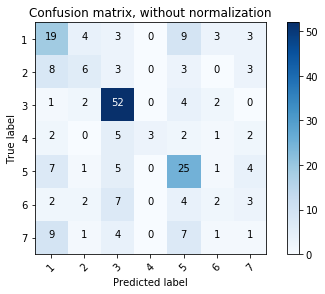

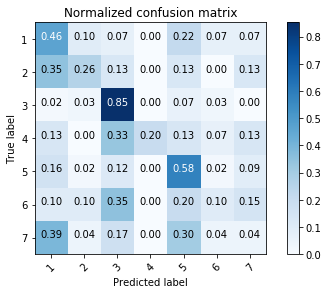

In [67]:
y_pred = mul_lr.predict(AllTest)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# y_pred = model2.predict_classes(np.array(Xtrain_feat))
class_names = np.array(['1','2','3','4','5','6','7'])
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## ROC curve

In [73]:
y_pred_sco = mul_lr.predict_proba(AllTest)

In [77]:
y_pred_sco

array([[0.04, 0.08, 0.03, ..., 0.73, 0.07, 0.03],
       [0.64, 0.08, 0.03, ..., 0.11, 0.07, 0.03],
       [0.02, 0.07, 0.01, ..., 0.87, 0.01, 0.01],
       ...,
       [0.14, 0.11, 0.1 , ..., 0.33, 0.05, 0.2 ],
       [0.55, 0.22, 0.03, ..., 0.08, 0.06, 0.03],
       [0.  , 0.  , 0.98, ..., 0.  , 0.  , 0.  ]])

In [86]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [87]:
fpr, tpr, thres = roc_curve(test_labels, y_pred_sco)
print('Area under the curve of the ROC:',auc(fpr, tpr))

plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

ValueError: multilabel-indicator format is not supported